# KNN CLASSIFICATION - SUPERVISED ML

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# For KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  # To calculate the accuracy of the model

#### <span style="color:BLUE"> ACCESSING THE DATA</SPAN>

In [72]:
url = "https://raw.githubusercontent.com/DataScience75/Batch-114/refs/heads/main/Students.csv"
data = pd.read_csv(url)
print("Number of records : ",data.shape[0])
print("Number of Columns : ",data.shape[1])
print("\n-------------DATA-------------------\n\n",data.head())

Number of records :  100
Number of Columns :  3

-------------DATA-------------------

       JEEPRE   JEEMAINS  STATUS
0  34.623660  78.024693       0
1  30.286711  43.894998       0
2  35.847409  72.902198       0
3  60.182599  86.308552       1
4  79.032736  75.344376       1


#### <span style="color:BLUE">SELECTING THE IMPORTANT FEATURES

In [73]:
X=data.iloc[:,0:2]
y=data.iloc[:,2]


#### <span style="color:BLUE">SAMPLING AND SPLITTING THE DATA INTO TRAINING AND TESTTING DATASET

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [75]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (70, 2)
Shape of y_train :  (70,)
Shape of X_test :  (30, 2)
Shape of y_test :  (30,)


### <span style="color:BLUE">CREATE A KNN CLASSIFIER MODEL WITH 3 NEIGHBORS (K=3)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_classifiy_model = KNeighborsClassifier(n_neighbors=3)

### <span style="color:BLUE">TRAINIING THE KNN CLASSIFIER MODEL WITH TAINING DATA: (fit) the KNN CLASSIFIER

In [78]:
%%time
knn_classifiy_model_train = knn_classifiy_model.fit(X_train,y_train)
print("KNN Classification Model Training Done")

KNN Classification Model Training Done
CPU times: total: 0 ns
Wall time: 4 ms


### <span style="color:BLUE"> CALCULATE THE PREDICTED PROBABILITY FOR BOTH THE CLASSES (0 & 1)

In [79]:
predicted_probability  = knn_classifiy_model_train.predict_proba(X_test)


print(type(predicted_probability))
print("Dimension of the array = ",predicted_probability.ndim)
print("Size of the array", len(predicted_probability)) # Should be the same as that of the X_test recor count 30
predicted_probability

<class 'numpy.ndarray'>
Dimension of the array =  2
Size of the array 30


array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ]])

### <span style="color:BLUE"> CALCULATE THE PREDICTED OUTPUT - (y_pred)

In [80]:
y_pred = knn_classifiy_model_train.predict(X_test)

In [81]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

### <span style="color:BLUE"> RESHAPING THE ACTUAL OUTPUT Y_TEST TO 1D ARRAY (.flatten())

In [82]:
y_test_actual = y_test.values.reshape(1,-1).flatten()
y_test_actual

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [83]:
print("Dimension of y_test_actual : ",y_test_actual.ndim)
print("Dimension of y_pred : ",y_pred.ndim)

Dimension of y_test_actual :  1
Dimension of y_pred :  1


### <span style="color:BLUE"> CREATE A NEW DATAFRAME TO SEE THE ACTUAL OUTPUT AND PREDICTED OUTPUT

In [84]:
actualVsPredicted =  pd.DataFrame({"Actual_output":y_test_actual,"Predicted_output":y_pred})

In [85]:
actualVsPredicted.head()

,Actual_output,Predicted_output
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1


### <span style="color:BLUE"> CALCULATE AND PLOT CONFUSION MARTIX <br><br>TO EVALUATE THE PERFORMACE OF THE LOGISTIC REGRESSION CLASSIFICATION MODEL

In [86]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [87]:
confusionMatrix = confusion_matrix(y_test_actual,y_pred)
confusionMatrix

array([[ 7,  3],
       [ 1, 19]], dtype=int64)

#### <span style="color:BLUE">DISPLAYING THE CONFUSION MATRIX

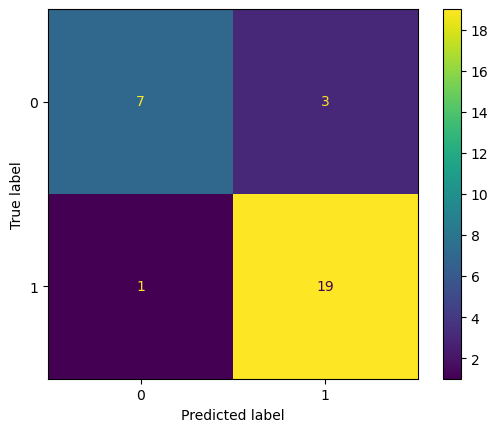

In [88]:
conf_matrix_disp = ConfusionMatrixDisplay(confusionMatrix,display_labels=knn_classifiy_model.classes_)
conf_matrix_disp.plot()

#### <span style="color:BLUE">MANUALLY CALCULATING THE ACCURACY AND THE ERROR USING THE DATA FROM CONFUSION MATRIX

In [89]:
#ACCUARCY
accuracy = (10+15)/(4+1+10+15)
print(f"The Accuracy of the KNN Classification model with k = 3 is {accuracy*100}%")

#ERROR
error_rate = 1-accuracy
print(f"The Error of the KNN Classification model with k = 3 is {error_rate*100}%")

The Accuracy of the KNN Classification model with k = 3 is 83.33333333333334%
The Error of the KNN Classification model with k = 3 is 16.666666666666664%


#### <span style="color:BLUE">CALCULATING THE ACCURACY AND THE ERROR USING THE accuracy_score

In [90]:
accuracyScore = accuracy_score(y_test,y_pred)
print(f"The Accuracy of the KNN Classification model with k = 3 is {accuracyScore*100}%")

#ERROR
error_rate = 1-accuracyScore
print(f"The Error of the KNN Classification model with k = 3 is {error_rate*100}%")

The Accuracy of the KNN Classification model with k = 3 is 86.66666666666667%
The Error of the KNN Classification model with k = 3 is 13.33333333333333%


# <span style="color:BLUE">CHOOSING THE OPTIMUM K VALUE 

**<span style="color:BLUE">1.Choose k from 1 to sqrt(len(X_test)) ie 0 - sqrt(30)<br>
2.calculate the error for all those k values Using error method<br>
3.Always choose ODD VALUE FOR K**

In [91]:
from math import sqrt

In [92]:
max_k = int(round(sqrt(len(X_test)),0))
max_k

5

### <span style="color:BLUE">CALCULATE THE VALIDATION ERRORS TO SELECT THE K VALUE

In [93]:
validation_error=[]
for k in range(1,(max_k+1)):
    knn_classifiy_model = KNeighborsClassifier(n_neighbors=k)
    knn_classifiy_model_train = knn_classifiy_model.fit(X_train,y_train)
    y_pred = knn_classifiy_model_train.predict(X_test)
    accuracyScore = accuracy_score(y_test,y_pred)
    error = 1 - accuracyScore
    validation_error.append(accuracyScore)
    


In [94]:
print("Validation error\n")
validation_error

Validation error



[0.9666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9, 0.9]

### <span style="color:BLUE"> PLOTTING THE VALIDATION ERROR
**1. Convert the validation_error list to a dataframe that is needed to plot a lineplot<br>
2. Plot a line chart**

In [95]:
### Creating a Dataframe for Validation error

validation_k_error_df = pd.DataFrame({"K-value":range(1,(max_k+1)),"validation_error":validation_error})
validation_k_error_df.head()

,K-value,validation_error
0,1,0.966667
1,2,0.933333
2,3,0.866667
3,4,0.900000
4,5,0.900000


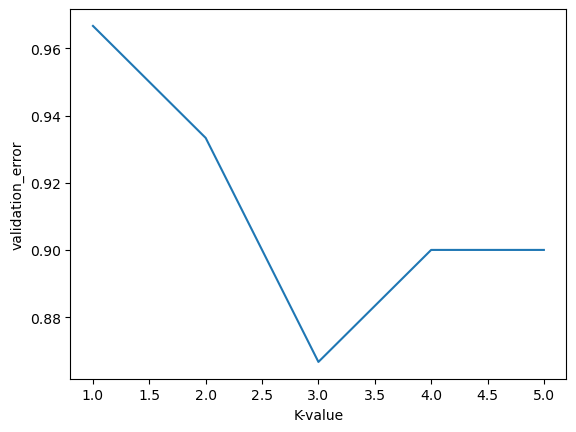

In [96]:
### Plotting Validation error line plot

sns.lineplot(data =validation_k_error_df, x = 'K-value', y = 'validation_error' )
plt.show()

### <span style="color:BLUE"> CONCULSION
**<span style="color:green">Since the error is minumum for k=3, the optimum k value selected should be 3**

In [97]:
# 